In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\student_kmeans_dataset.csv",encoding="utf-8")


In [5]:
df.head()

,Student_ID,Study_Hours,Exam_Score
0,1,2,20
1,2,3,25
2,3,4,28
3,4,6,45
4,5,7,50


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Student_ID   12 non-null     int64
 1   Study_Hours  12 non-null     int64
 2   Exam_Score   12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


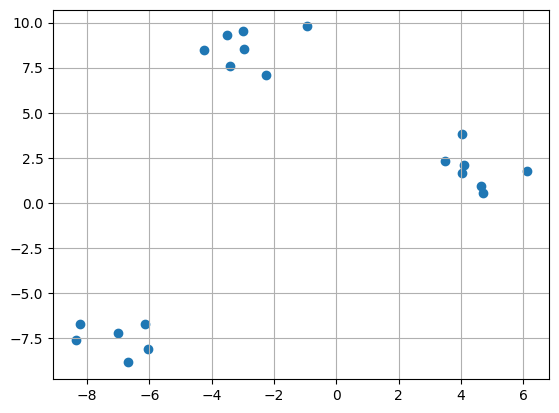

In [7]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 20,n_features = 2,centers = 3,random_state = 42)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

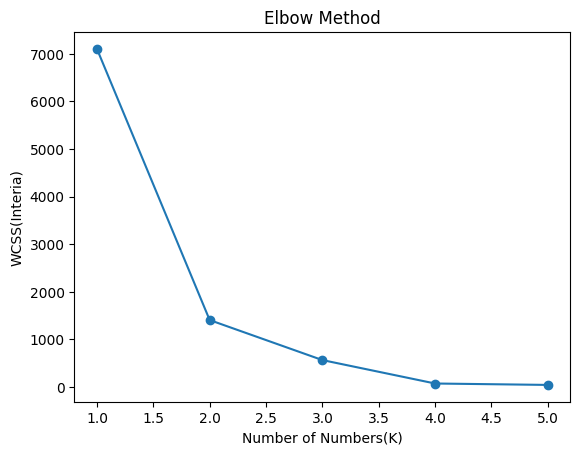

In [13]:
from sklearn.cluster import KMeans
X=df[['Study_Hours','Exam_Score']]
#elbow method
wcss=[]
for k in range(1,6):
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,6),wcss,marker='o')
plt.xlabel('Number of Numbers(K)')
plt.ylabel('WCSS(Interia)')
plt.title('Elbow Method')
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,random_state=42,n_init=10)
df['Cluster']=kmeans.fit_predict(X)
df

,Student_ID,Study_Hours,Exam_Score,Cluster
0,1,2,20,2
1,2,3,25,2
2,3,4,28,2
3,4,6,45,0
4,5,7,50,0
5,6,8,48,0
6,7,10,70,1
7,8,11,68,1
8,9,12,72,1
9,10,14,85,1


In [19]:
centroids_k3 = kmeans.cluster_centers_


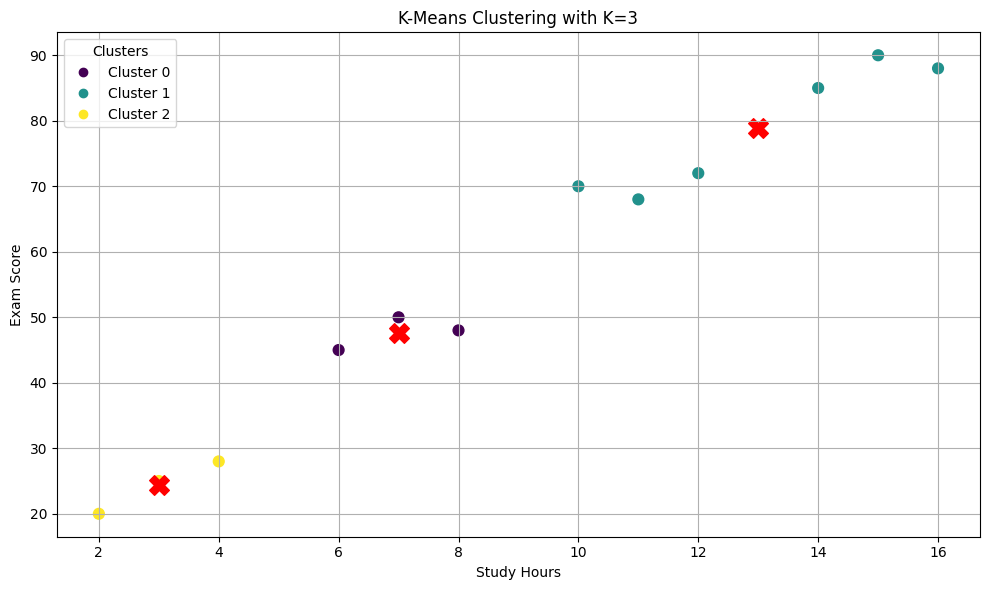

In [20]:
plt.figure(figsize=(10, 6))
scatter_k3 = plt.scatter(df['Study_Hours'], df['Exam_Score'], c=df['Cluster'], cmap='viridis', s=60, label='Students')
plt.scatter(centroids_k3[:, 0], centroids_k3[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('K-Means Clustering with K=3')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend(handles=scatter_k3.legend_elements()[0], title='Clusters', labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
cluster_summary = df.groupby('Cluster').agg(
    Avg_Study_Hours=('Study_Hours', 'mean'),
    Avg_Exam_Score=('Exam_Score', 'mean'),
    Count=('Student_ID', 'count')
).reset_index()

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
   Cluster  Avg_Study_Hours  Avg_Exam_Score  Count
0        0              7.0       47.666667      3
1        1             13.0       78.833333      6
2        2              3.0       24.333333      3
